<a href="https://colab.research.google.com/github/robertocsa/Natural-Language-Processing-NLP-/blob/main/Roteiro_para_classifica%C3%A7%C3%A3o_de_textos_Bert_e_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Roteiro Completo para a Classificação de Textos Usando BERT e KMeans**
Este roteiro orienta na criação de um fluxo de trabalho completo para a classificação de textos, desde a preparação do corpus até a visualização dos clusters em gráficos interativos. Cada passo é detalhado para garantir que o processo seja executado de forma eficiente.

**1. Leitura de um Corpus de Sentenças**
O primeiro passo é carregar o corpus, que pode ser lido de um arquivo CSV ou qualquer outra fonte de dados.

In [ ]:
import pandas as pd

# Exemplo: Leitura de um corpus de um arquivo CSV ou lista
# Se for um CSV:
# df = pd.read_csv('corpus.csv')
# corpus = df['sentencas'].tolist()

# Exemplo simples com uma lista
corpus = [
    "Eu adoro programar em Python.",
    "A inteligência artificial está mudando o mundo.",
    "Gosto de fazer análises de dados.",
    "Programar é uma habilidade muito valorizada.",
    "O futuro da tecnologia é promissor.",
    "Desenvolver aplicações é muito interessante.",
    "Eu adoro jogar futebol.",
    "O futebol é um esporte muito popular.",
    "Programar em Python é divertido.",
    "Eu amo aprender novas linguagens de programação.",
    "A música é uma forma de arte.",
    "Futebol é um esporte que une as pessoas.",
    "Aprender programação me traz alegria.",
    "Eu gosto de desenhar.",
    "O Python é uma linguagem poderosa.",
    "Desenhar é uma forma de expressão.",
    "Programar é uma habilidade essencial.",
    "Arte é uma expressão da criatividade.",
    "Futebol e arte podem coexistir.",
    "Aprender novas habilidades é gratificante.",
    "Jogos de futebol trazem emoção.",
    "Cantar e tocar instrumentos é divertido.",
]

df_corpus=pd.DataFrame(corpus, columns=['Sentencas'])
df_corpus

,Sentencas
0,Eu adoro programar em Python.
1,A inteligência artificial está mudando o mundo.
2,Gosto de fazer análises de dados.
3,Programar é uma habilidade muito valorizada.
4,O futuro da tecnologia é promissor.
5,Desenvolver aplicações é muito interessante.
6,Eu adoro jogar futebol.
7,O futebol é um esporte muito popular.
8,Programar em Python é divertido.
9,Eu amo aprender novas linguagens de programação.


**2. Preparo Inicial (Minúsculas, Stop-Words, Lematização, Stemming)**
Realizamos o pré-processamento do texto para remover palavras irrelevantes, transformar tudo em minúsculas e aplicar lematização ou stemming.

**Lematização e stemming** são técnicas usadas para normalizar palavras em tarefas de processamento de linguagem natural (PLN):

**Lematização**: Reduz uma palavra à sua forma base ou "lema", preservando o significado gramatical. Por exemplo, "correndo" se torna "correr". A lematização usa o contexto da palavra para escolher a forma correta.

**Stemming**: Reduz uma palavra à sua raiz ou "stem", removendo sufixos ou prefixos sem levar em consideração o contexto. Exemplo: "correndo" se torna "corr". O processo é mais mecânico e pode resultar em palavras não reais.

*Lematização* é mais precisa, enquanto *stemming* é mais rápido.

In [ ]:
!python -m spacy download pt_core_news_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 36.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import spacy

nltk.download('stopwords')
nltk.download('punkt')

# Carregar stopwords e inicializar stemmer e lematizador
stop_words = set(stopwords.words('portuguese'))
stemmer = SnowballStemmer("portuguese")
nlp = spacy.load('pt_core_news_sm')

# Função para preprocessar o texto
def preprocess_text(text):
    doc = nlp(text.lower())  # Minúsculas e lematização
    processed_words = [stemmer.stem(token.lemma_) for token in doc if token.is_alpha and token.lemma_ not in stop_words]
    return " ".join(processed_words)

# Aplicar o preprocessamento a todo o corpus
df_corpus['Sentencas_preprocessadas'] = [preprocess_text(sentence) for sentence in df_corpus['Sentencas']]

df_corpus


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Sentencas,Sentencas_preprocessadas
0,Eu adoro programar em Python.,ador program python
1,A inteligência artificial está mudando o mundo.,inteligent artificial mud mund
2,Gosto de fazer análises de dados.,gost faz anális dad
3,Programar é uma habilidade muito valorizada.,program habil valoriz
4,O futuro da tecnologia é promissor.,futur de tecnolog promissor
5,Desenvolver aplicações é muito interessante.,desenvolv aplic interess
6,Eu adoro jogar futebol.,ador jog futebol
7,O futebol é um esporte muito popular.,futebol esport popul
8,Programar em Python é divertido.,program python divert
9,Eu amo aprender novas linguagens de programação.,amo aprend nov linguag program


3. Remoção de Palavras que Atrapalham
Após a análise, podemos remover palavras que prejudicam a classificação.

In [ ]:
# Função para remover palavras específicas
def remove_problematic_words(text, words_to_remove):
    return " ".join([word for word in text.split() if word not in words_to_remove])

# Lista de palavras problemáticas
problematic_words = ['arte','form','emoçã','ador','de', 'gost', 'ser', 'amo', 'gost', 'divert', 'traz', 'alegri', 'form','interess', 'popul', 'mud', 'mund', 'promissor','unir', 'pesso']

# Aplicar a remoção
df_corpus['Sentencas_sem_palavras_problematicas'] = [remove_problematic_words(sentence, problematic_words) for sentence in df_corpus['Sentencas_preprocessadas']]
df_corpus


,Sentencas,Sentencas_preprocessadas,Sentencas_sem_palavras_problematicas
0,Eu adoro programar em Python.,ador program python,program python
1,A inteligência artificial está mudando o mundo.,inteligent artificial mud mund,inteligent artificial
2,Gosto de fazer análises de dados.,gost faz anális dad,faz anális dad
3,Programar é uma habilidade muito valorizada.,program habil valoriz,program habil valoriz
4,O futuro da tecnologia é promissor.,futur de tecnolog promissor,futur tecnolog
5,Desenvolver aplicações é muito interessante.,desenvolv aplic interess,desenvolv aplic
6,Eu adoro jogar futebol.,ador jog futebol,jog futebol
7,O futebol é um esporte muito popular.,futebol esport popul,futebol esport
8,Programar em Python é divertido.,program python divert,program python
9,Eu amo aprender novas linguagens de programação.,amo aprend nov linguag program,aprend nov linguag program


In [ ]:
!pip install sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer

# Aplicar a pré-processamento em cada sentença
corpus_prepared = [preprocess_text(sentence) for sentence in df_corpus['Sentencas_sem_palavras_problematicas']]

# 2. Embeddings com BERT
embedder = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')  # Modelo Multilingue
embeddings = embedder.encode(corpus_prepared)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning:

`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884



**4. Classificação Prévia (BERT + KMeans)**

Transformamos o corpus em embeddings usando o BERT e depois aplicamos o KMeans para realizar o agrupamento de sentenças.

Variância explicada por cada componente: [0.30051184 0.19798215 0.09203671 0.08141548 0.06757695 0.05412477
 0.04454318 0.03509483 0.02995035 0.02219577]
Variância total explicada: 0.9254320189356804


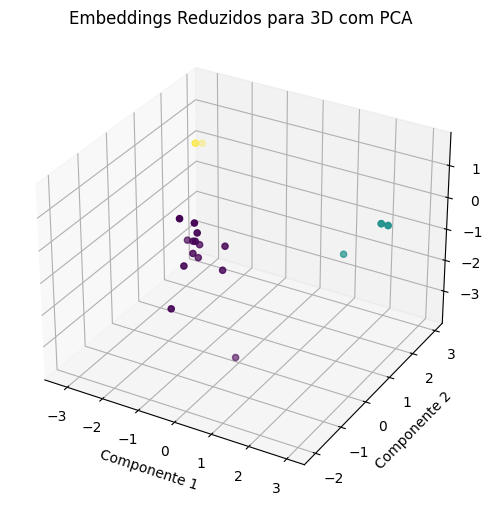

,Sentencas_sem_palavras_problematicas,Agrupamento
0,program python,2
1,inteligent artificial,0
2,faz anális dad,0
3,program habil valoriz,0
4,futur tecnolog,0
5,desenvolv aplic,0
6,jog futebol,1
7,futebol esport,1
8,program python,2
9,aprend nov linguag program,0


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Exemplo: Se 'embeddings' são os vetores de embeddings obtidos de BERT ou outro modelo
# Embeddings é um numpy array de shape (n_samples, n_features)

# Aplicando PCA para reduzir a dimensionalidade para 10D
pca = PCA(n_components=10)
embeddings_10d = pca.fit_transform(embeddings)

# Visualizando a variância explicada
print(f'Variância explicada por cada componente: {pca.explained_variance_ratio_}')
print(f'Variância total explicada: {sum(pca.explained_variance_ratio_)}')

# Definindo o número de clusters
num_clusters = 3  # Ajuste conforme necessário
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
labels = kmeans.fit_predict(embeddings_10d)  # labels agora contém os clusters atribuídos

# Visualizando os embeddings reduzidos em 3D
# Aplicando PCA para reduzir a dimensionalidade para 3D
pca = PCA(n_components=3)
embeddings_3d = pca.fit_transform(embeddings_10d)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Visualizando os embeddings com as cores dos clusters
ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2], c=labels, cmap='viridis')

# Definindo labels e título
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')
ax.set_title('Embeddings Reduzidos para 3D com PCA')

plt.show()

# Aplicar KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
agrupamento = kmeans.fit_predict(embeddings_10d)
df= pd.DataFrame([df_corpus['Sentencas_sem_palavras_problematicas'],agrupamento])
# Transpondo o DataFrame
df = df.T

# Renomeando as colunas para dar mais significado
df.columns = ['Sentencas_sem_palavras_problematicas', 'Agrupamento']
df



**5. Vincular Clusters com Categorias**

Podemos mapear os clusters a categorias.

In [ ]:
cluster_categories = {0: 'Desenvolvimento e aprendizado de habilidades', 1: 'Jogos e esportes', 2: 'Programação Python', 3: 'Música e Artes'}
df['categoria'] = df['Agrupamento'].map(cluster_categories)
df


,Sentencas_sem_palavras_problematicas,Agrupamento,categoria
0,program python,2,Programação Python
1,inteligent artificial,0,Desenvolvimento e aprendizado de habilidades
2,faz anális dad,0,Desenvolvimento e aprendizado de habilidades
3,program habil valoriz,0,Desenvolvimento e aprendizado de habilidades
4,futur tecnolog,0,Desenvolvimento e aprendizado de habilidades
5,desenvolv aplic,0,Desenvolvimento e aprendizado de habilidades
6,jog futebol,1,Jogos e esportes
7,futebol esport,1,Jogos e esportes
8,program python,2,Programação Python
9,aprend nov linguag program,0,Desenvolvimento e aprendizado de habilidades


**6. Identificação e Contagem de Palavras que Aparecem em Mais de um Cluster**

Aqui, contamos as palavras que aparecem em mais de um cluster.

In [ ]:
from collections import defaultdict

# Função para obter as palavras e seus clusters
def get_words_clusters(corpus, cluster_labels):
    word_clusters = defaultdict(lambda: defaultdict(int))
    for i, sentence in enumerate(corpus):
        words = sentence.split()
        cluster = cluster_labels[i]
        for word in words:
            word_clusters[word][cluster] += 1
    return word_clusters

# Contar palavras em múltiplos clusters
word_clusters = get_words_clusters(df['Sentencas_sem_palavras_problematicas'], df['Agrupamento'])
for word, clusters in word_clusters.items():
    if len(clusters) > 1:
        print(f"{word}: {clusters}")


program: defaultdict(<class 'int'>, {2: 2, 0: 4})
linguag: defaultdict(<class 'int'>, {0: 1, 2: 1})


**7. Identificação do Número Ideal de Clusters (técnica do Cotovelo)**

Usamos a técnica do cotovelo para encontrar o número ideal de clusters.

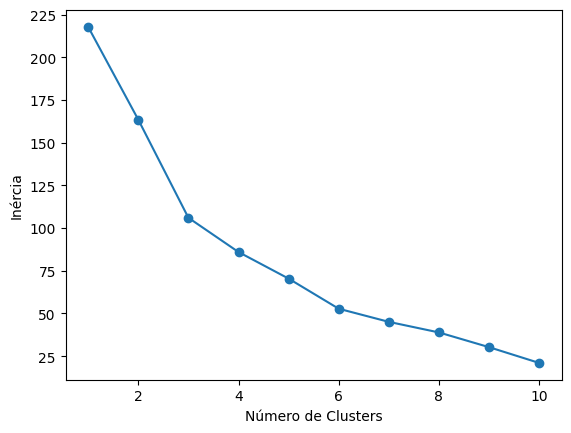

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

def elbow_method(X):
    distortions = []
    for i in range(1, 11):
        km = KMeans(n_clusters=i, random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    # Plot do cotovelo
    plt.plot(range(1, 11), distortions, marker='o')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Inércia')
    plt.show()

elbow_method(embeddings_10d)


**8. Nuvens de Palavras por Cluster**

Podemos gerar nuvens de palavras para cada cluster usando wordcloud.

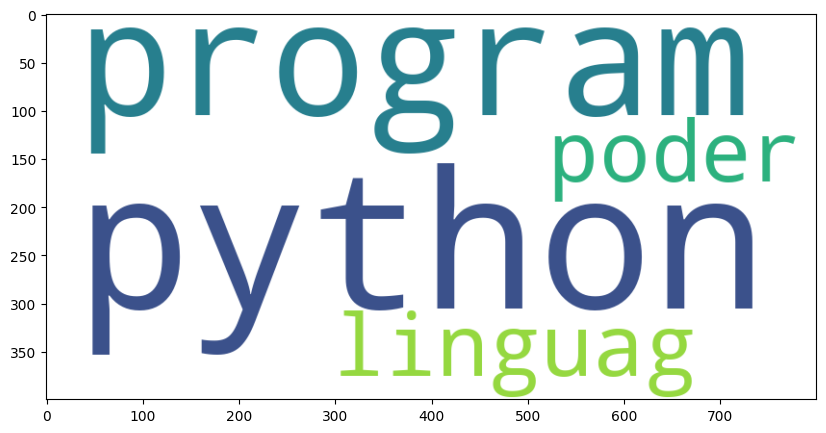

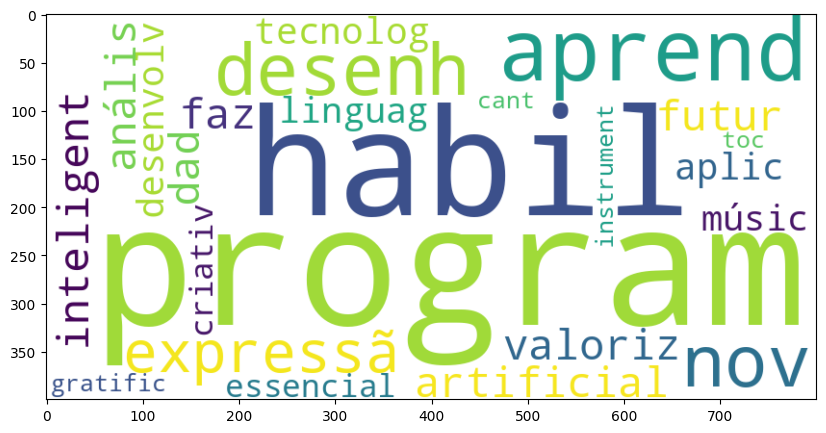

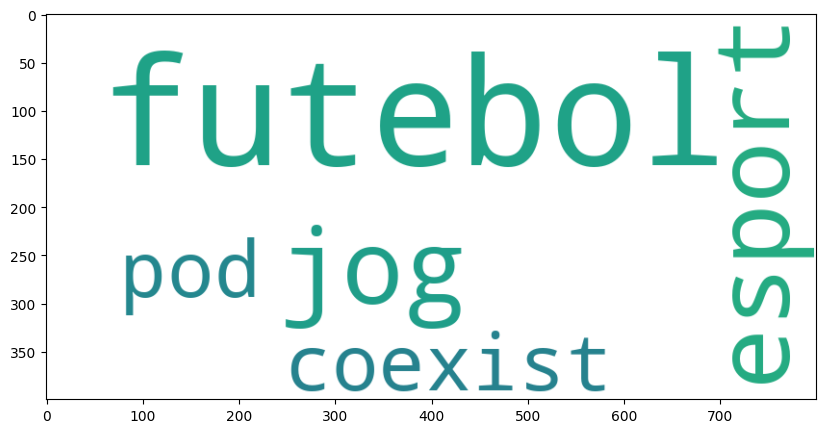

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Função para gerar nuvem de palavras
def generate_wordcloud(cluster_texts):
    text = " ".join(cluster_texts)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    #plt.axis('off')
    plt.show()

# Gerar nuvem de palavras para cada cluster
for cluster in df['Agrupamento'].unique():
    cluster_texts = df[df['Agrupamento'] == cluster]['Sentencas_sem_palavras_problematicas'].tolist()
    generate_wordcloud(cluster_texts)


9. Sentenças e IDs por Cluster
Apresentamos as sentenças de cada cluster.

In [ ]:
# Exibir sentenças por cluster
for cluster in df['Agrupamento'].unique():
    print(f"\nCluster {cluster}:")
    print(df[df['Agrupamento'] == cluster]['Sentencas_sem_palavras_problematicas'].tolist())
df


Cluster 2:
['program python', 'program python', 'python linguag poder']

Cluster 0:
['inteligent artificial', 'faz anális dad', 'program habil valoriz', 'futur tecnolog', 'desenvolv aplic', 'aprend nov linguag program', 'músic', 'aprend program', 'desenh', 'desenh expressã', 'program habil essencial', 'expressã criativ', 'aprend nov habil gratific', 'cant toc instrument']

Cluster 1:
['jog futebol', 'futebol esport', 'futebol esport', 'futebol pod coexist', 'jog futebol']


,Sentencas_sem_palavras_problematicas,Agrupamento,categoria
0,program python,2,Programação Python
1,inteligent artificial,0,Desenvolvimento e aprendizado de habilidades
2,faz anális dad,0,Desenvolvimento e aprendizado de habilidades
3,program habil valoriz,0,Desenvolvimento e aprendizado de habilidades
4,futur tecnolog,0,Desenvolvimento e aprendizado de habilidades
5,desenvolv aplic,0,Desenvolvimento e aprendizado de habilidades
6,jog futebol,1,Jogos e esportes
7,futebol esport,1,Jogos e esportes
8,program python,2,Programação Python
9,aprend nov linguag program,0,Desenvolvimento e aprendizado de habilidades


10. Redução de Dimensionalidade (PCA 2D e 3D)
Reduzimos os embeddings para 2D e 3D para visualização.

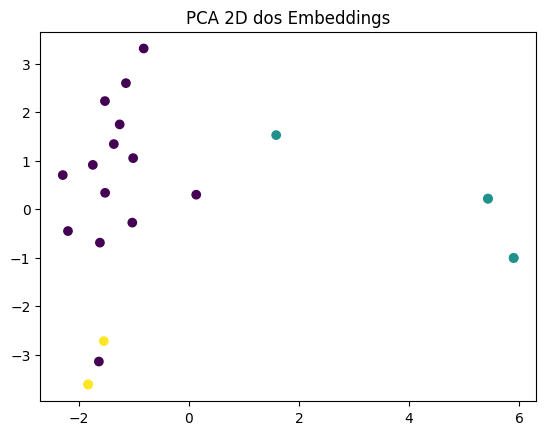

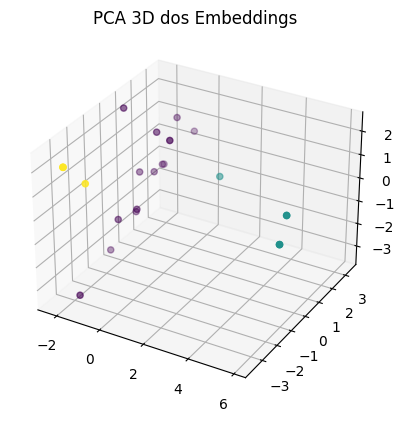

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Redução para 2D
pca_2d = PCA(n_components=2)
embeddings_2d = pca_2d.fit_transform(embeddings_cleaned)

plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=df['Agrupamento'])
plt.title('PCA 2D dos Embeddings')
plt.show()

# Redução para 3D
pca_3d = PCA(n_components=3)
embeddings_3d = pca_3d.fit_transform(embeddings_cleaned)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2], c=df['Agrupamento'])
plt.title('PCA 3D dos Embeddings')
plt.show()


12. Gráficos 2D e 3D Interativos
Usamos plotly para visualizações interativas.

In [ ]:
import plotly.express as px

# Gráfico 2D
fig = px.scatter(embeddings_2d, x=0, y=1, color=df['categoria'], hover_data=[df['Sentencas_sem_palavras_problematicas']])
fig.show()

# Gráfico 3D
fig = px.scatter_3d(embeddings_3d, x=0, y=1, z=2, color=df['categoria'], hover_data=[df['Sentencas_sem_palavras_problematicas']])
fig.show()


Conclusão
Este roteiro completo leva você através de todas as etapas para classificação de textos com BERT e KMeans, desde a leitura e pré-processamento até a visualização interativa dos resultados